In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the California Housing dataset
california = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable (housing prices) to the DataFrame
df['PRICE'] = california.target

# Display the first few rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns=['PRICE'])
y = df['PRICE']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing data
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (16512, 8), Testing data shape: (4128, 8)


In [5]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [6]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.53
Root Mean Squared Error (RMSE): 0.75


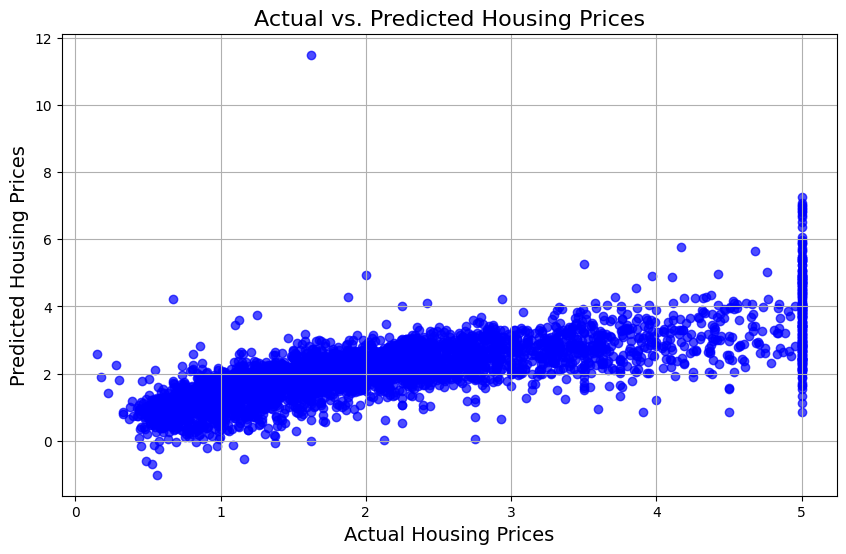

In [7]:
# Create a scatter plot comparing actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.title('Actual vs. Predicted Housing Prices', fontsize=16)
plt.xlabel('Actual Housing Prices', fontsize=14)
plt.ylabel('Predicted Housing Prices', fontsize=14)
plt.grid(True)
plt.show()